# Telecommunication Churn Rate

A telecommunication service providers has provided [data](https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data) on past clients and their churn, that is whether or not they left the company as clients. Their goal is to develop a model that can predict whether or not a new client or an existing client is going to leave the company. The data collected on the clients pertain to their gender, number of years they have been with the company, whether or not they have dependents, their number of dependents, etc.

The target variable __Churn__ contains 2 classes __Yes__ and __No__. Yes means that the client leaves the company and No means the client stayed. 

Creating a predictive model will help the company know the clients who will leave the company and help put in place measures to keep these clients, for instances making them great offers. 

The data would be collected from the company's database. 

#### Problem Statement
Create a predictive model that classifys a client as Churn (__Yes__) or Not Churn (__No__).
This new model will be used throughout the company to ensure maximum company and client satisfaction

## Importing the libraries needed for the tasks

In [1]:
# importing libraries


# for data importing and manipulation
import pandas as pd   

# for data array and matrix manipulation
import numpy as np  

# for plotting data
import matplotlib.pyplot as plt 

# for encoding and standizing the data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# to handle imbalanced data
from imblearn.over_sampling import SMOTE

# to split the dataset into train and test set
from sklearn.model_selection import train_test_split

# for performing hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# models to be trained
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# for model evaluation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

## Reading and Inspecting the data


#### Reading the csv file
The file containing the data is a comma seperated val file. The Pandas library has a function that can be used to import files of different formats including .csv files

In [2]:
# importing the dataset using pandas' .read_csv
df = pd.read_excel("Telecom Churn Rate Dataset.xlsx")

# displaying the first five rows of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# generating descriptive statistics of the data attributes
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,2,4,NaN,6531,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,NaN,,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,2810,2785,3875,4171,2365,NaN,11,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,0.515689,0.419566,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,1.275299,1.250117,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,0.000000,0.000000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,0.000000,0.000000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,0.000000,0.000000,NaN


## Data Exploration

In [5]:
# printing the information of the data attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


An overview of the data shows that there are 7043 entries in the dataset, with no __explicit__ null values. It also shows that there are 20 parameters that determing the __Churn__ of a single client.

###### Checking for implicit null values

In [6]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('_____________________________________________')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
_____________________________________________
gender
Male      3555
Female    3488
Name: gender, dtype: int64
_____________________________________________
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
_____________________________________________
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
_____________________________________________
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
_____________________________________________
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
_____________________________________________
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
________

The __TotalCharges__ column is the only attribute that contains implicit null values. 

The implicit null value in the __TotalCharges__ column is just an empty column. This kind of value can't be detected by printing the information of the dataset. 
This will have to be dealt with for both train and test set since not all models can handle missing values.

###### Checking duplicate
Although the data shows no explicit null values, it is worth checking is the data contains __duplicate__ rows

In [7]:
# checking if there are any duplicated rows in the dataset
df.columns.duplicated().sum()

0

No Rows were duplicated in the dataset

### Dropping some columns and rows and Correcting data types

###### CustomerID column

In [8]:
# checking the distinct values in the customerID column
df.customerID.value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

The customer ID column contains distinct values for each customer in the data, hence has no relevance to the data.

In [9]:
# dropping the customerID column
df.drop("customerID", axis = 1, inplace = True)

##### Total Charges column

The total charges attributes have an object data type instead of a float data type (as seen from the first few values), hence some exploratory analysis has to be done for the attribute.

In [10]:
# checking the distinct values in the TotalCharges column
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [11]:
# printing the first five rows of the data where the TotalCharges is an empty string
df[df.TotalCharges==' '].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,5,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,1,0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,0,No


There are 11 entries of __TotalCharges__ that have implicit null values. 

In [12]:
# replacing empty entry with pd.NaT
df["TotalCharges"] = df["TotalCharges"].replace(' ', pd.NaT)

# droping null values
df.dropna(inplace = True)

In [13]:
# checking the distinct values in the TotalCharges column to make sure the empty string values have been removed
df.TotalCharges.value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64

Since there are now no empty string values, the column can now be converted into the right data type

In [14]:
# changing the data type of the TotalCharges column
df["TotalCharges"] = df["TotalCharges"].astype('float')

# checking the type of the TotalCharges column
df["TotalCharges"].dtypes

dtype('float64')

The data type has successfully been converted to a float data type

##### SeniorCitizen

Even though the __SeniorCitizen__ column contains __0__ and __1__ and has an __int64__ data type it represents classes. These values will have to be encoded to represent the classes __Yes__ and __No__, using the Column Transformer

In [15]:
# printing the first 5 rows of the data
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

The values and the data types of the column has been changed.

## Feature Engineering

This section deals with transforming the features of the data to suit the task at hand. This section involved:
1. Standardizing the numerical columns
2. Encoding the categorical columns
3. Upsampling to ensure the different classes of the target variable have the same count.



### Splitting the data into train and test set

Before beginning these processes, the data is split into train and test set to prevent data leakage. The data predictors are first assigned to x_data and the target variable is assigned to y_data. These two datasets are then split using the sklearn's __train_test_split__ using a test_size of _33%_. 

This will randomly assign _33%_ of the values to the __testset__ and _67%_ of the values to the __trainset__.

In [16]:
# splitting the trainset into dependent and independent sets. The Churn column is the value to be predicted
x_data = df.drop('Churn', axis=1)
y_data = df['Churn']

In [17]:
# splitting the trainset into a training set and a testing set.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=4)

# printing the shapes of the train and test data
print("X train dataset has a size:", x_train.shape)
print("Y train dataset has a size:", y_train.shape)
print("X test dataset has a size:", x_test.shape)
print("Y test dataset has a size:", y_test.shape)

X train dataset has a size: (4711, 21)
Y train dataset has a size: (4711,)
X test dataset has a size: (2321, 21)
Y test dataset has a size: (2321,)


In [18]:
# checking the number of distinct classes in the target variable
print("Value count of classes of the target variable\n", y_train.value_counts())

Value count of classes of the target variable
 No     3491
Yes    1220
Name: Churn, dtype: int64


The target varaible contains an imbalanced number of classes

### Visualizing the numerical attributes

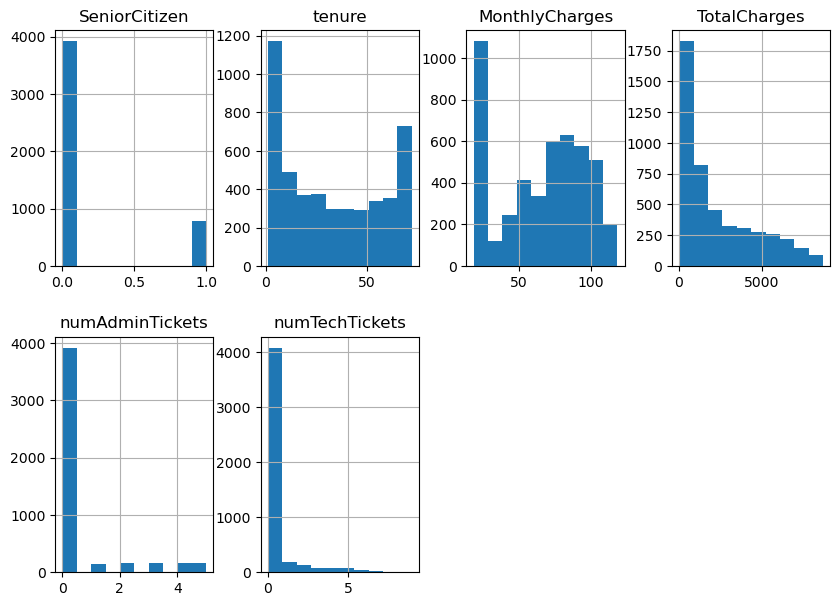

In [19]:
# plotting histograms of the various attributes using 10 bins
x_train.hist(bins=10, figsize=(10, 15), layout=(4,4))
plt.show()

The histogram plots of the various attributes helps to determine the scaling method to use to standardize the attributes. 

###### Histogram Takeaways
 __Tenure__ , __MonthlyCharges__  and __TotalCharges__ show a larger range than the rest of the numerical attributes. Hence those columns will have to be scaled to be within the range of the other attributes.
 
However, the numerical columns will be standardized since doing that gave a higher accuracy than when they were not. __Senior Citizen__ will be encoded since it is not really a numerical value but a __Yes__ or __No__ value.


### Encoding using ColumnTransformer

Column Transformer provides a comprehensive way to standardize and encode data.

In using the column transformer, we have to specify the preprocessing method for both categorical and numerical. The StandardScaler and OneHotEncoder showed a higher accuracy than other stardization and encoding methods. 

In this column transformer, the StandardScaler is used to scale the numeric data and the OneHotEncoder is using to encode categorical data. handle_unkown is set to ignore to enable the transformer ignore any class that was not in the dataset used in the fitting of the transformer. 

In [20]:
# The scalers, encoders and the columns to scale and encode are passed as parameters into the column transformer 

# creating a column transformer object
transformer = ColumnTransformer([
    ('scale', StandardScaler(with_mean=False), ['tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
                                                'numTechTickets']),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'), ['InternetService', 'MultipleLines', 'DeviceProtection',
                                                          'OnlineSecurity','OnlineBackup', 'StreamingMovies', 'TechSupport',
                                                          'Contract', 'PaymentMethod','gender', 'SeniorCitizen',
                                                          'Partner', 'Dependents','PhoneService', 'PaperlessBilling',
                                                          'StreamingTV'])
    ])

In [21]:
# fitting the transformer on the train set
transformer.fit(x_train)

ColumnTransformer(transformers=[('scale', StandardScaler(with_mean=False),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges',
                                  'numAdminTickets', 'numTechTickets']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['InternetService', 'MultipleLines',
                                  'DeviceProtection', 'OnlineSecurity',
                                  'OnlineBackup', 'StreamingMovies',
                                  'TechSupport', 'Contract', 'PaymentMethod',
                                  'gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService',
                                  'PaperlessBilling', 'StreamingTV'])])

In [22]:
# transforming both the train and test set
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [23]:
# printing the shape of the data
print("X train dataset has a size after transforming: ",x_train.shape)
print("X test dataset has a size after transforming: ",x_test.shape)

X train dataset has a size after transforming:  (4711, 48)
X test dataset has a size after transforming:  (2321, 48)


## Handling Imbalanced Data

Imbalanced data occurs when the distribution of classes is uneven. The class with the highest count in the target class is termed the majority class and the other class or classes are termed the minority class.
Imbalanced data can cause machine learning models to have lower accuracy, as they may be biased towards the majority class and fail to properly classify the minority class.

### Using the Synthetic Minority Over-sampling Technique (SMOTE) to handle the imbalanced dataset

The SMOTE technique creates synthetic data of the minority class to balance the majority class. 

__NOTE__: Introducing synthetic data also introducing some sort of bias into the dataset that will be used to train the model.

Correcting an imbalance in the count of the classes of the target variable prevents the model from learning too much form the majority class and assume that it has a higher significance, and being baised towards the class with a few values. 


In [24]:
# checking the counts of classes of the target variable
print("Value count of classes of the target variable\n", y_train.value_counts())

Value count of classes of the target variable
 No     3491
Yes    1220
Name: Churn, dtype: int64


Looking at the Class attribute which is the target variable, there is an imbalance in the 2 classes. Creating a model with this imbalance is going to give more precedence to the No class and the least to the Yes class.

To correct this, the SMOTE technique is used to upsample the dataset.

__Note__: Training the model without balancing the target variable classes only marginally improved the accuracy of the different models.

In [25]:
# creating the SMOTE instance where the five closest neighbors to a point are used to generate a new point
smote = SMOTE(sampling_strategy='auto', k_neighbors=5)

# fitting and resampling the dataset to create new synthetic datapoints
x_train, y_train = smote.fit_resample(x_train, y_train)


In [26]:
# printing the shape of the new train data
print("X train dataset has a size after upsampling: ",x_train.shape)
print("Y train dataset has a size after upsampling: ",y_train.shape)

X train dataset has a size after upsampling:  (6982, 48)
Y train dataset has a size after upsampling:  (6982,)


In [27]:
# checkinig the counts of the classes of the target variable
print("Value count of classes of the target variable\n", y_train.value_counts())

Value count of classes of the target variable
 No     3491
Yes    3491
Name: Churn, dtype: int64


The dataset now has a target variable with a balanced number of classes: __3491__. The dataset has also increased from __4711__ to __6982__ entries.

### Dimentionality reduction

Performing dimentionality reduction reduced the values of all the evaluation metrics. 
Since the dataset contains only 37 predictors, reducing the number of attributes could potentially remove valuable data. Hence, there is no need for dimentionality reduction

### This is the end of Feature Engineering

## Model Building

This session involves creating models and checking the accuracies of the model to make predictions. In this section, the hyperparameters of the best models will be tuned to give the best accuracy and the model with the highest accuracy will be finally used to make prediction.



In [28]:
# printing the shape of the train and test data
print("X train dataset has a size:", x_train.shape)
print("Y train dataset has a size:", y_train.shape)
print("X test dataset has a size:", x_test.shape)
print("Y test dataset has a size:", y_test.shape)

X train dataset has a size: (6982, 48)
Y train dataset has a size: (6982,)
X test dataset has a size: (2321, 48)
Y test dataset has a size: (2321,)


Since this tasks requires customers to be classified as whether the left or not, it is a __Classification__ problem and since the data used to train the model has a labeled target variable __Supervised Classification__ models will be developed and tuned. The supervised classification models considered are 
1. Decision Tree Classifier
2. Random Forest Classifier
3. Support Vector Machines
4. K Neighbors Classifier.

Some selcted hyperparameters of these models will be tuned and their accuracies will be measured using Grid Search. A cross validation value (cv) of 5 will be set in order to split the train data into 5 parts and at each iteration 4 parts will be used to train the model and 1 part will be used to test the model for its accuracy. 

## Performing Hyperparameter Tuning using GridSearchCV

Hyperparameter tuning allows for different hyperparameters to be trained and evaluated at the same time. Accuracy is used as an evaluation metric for the tuning process.

### Tuning the hyperparameters of a Decision Tree Classifier

default hyperparameter for decision tree are: 
criterion = 'gini', max_depth = None, min_samples_split = 2, max_leaf_nodes = none

In [29]:
# specifying the parameters
parameters = {"criterion": ("gini", "entropy"), 
              'max_depth':range(1, 10), 
              'min_samples_split':range(2, 10), 
              'max_leaf_nodes':range(2, 10)}

# creating the grid search model and setting the number of cross validations to 5
model_2 = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy', cv=5, n_jobs=-1)

# training the model
model_2.fit(x_train, y_train)

# Checking accurary of the model and the best hyperparameters
print("Accurary of best decision tree classifier = {:.2f}%".format(model_2.best_score_*100))
print("Best hyperparameter for the model = {}".format(model_2.best_params_))


Accurary of best decision tree classifier = 83.82%
Best hyperparameter for the model = {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}


### Tuning the hyperparameters of a Random Forest Classifier

Default values of the hyperparameters a Random Forest model that will be tuned are:
n_estimators=100, criterion = 'gini' , max_depth = None

In [30]:
# defining the hyperparameters
param_grid = {"n_estimators":[100, 200, 300, 400, 500], 
              "criterion":['gini', 'entropy'], 
              "max_depth":range(20, 30, 5)}

# creating the grid search model and setting the number of cross validations to 5
model_3 = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# training the model
model_3.fit(x_train, y_train)

# Checking accurary of the model and the best hyperparameters
print("Accurary of best random forest classifier = {:.2f}%".format(model_3.best_score_*100))
print("Best hyperparameter for the model = {}".format(model_3.best_params_))

Accurary of best random forest classifier = 90.13%
Best hyperparameter for the model = {'criterion': 'gini', 'max_depth': 25, 'n_estimators': 200}


### Tuning the hyperparameters of a Support Vector Machine

Default values of the hyperparameters a Support Vector Machine that will be tuned are:
kernel = 'rbf', C = 1.0, degree = 3

In [31]:
# specifying the hyperparameters
param_grid = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
              'C':range(1,5),
              'degree':range(1, 5)}

# creating the grid search model and setting the number of cross validations to 5
model_4 = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# training the model
model_4.fit(x_train, y_train)

# Checking accurary of the model and the best hyperparameters
print("Accurary of best logistic regression model = {:.2f}%".format(model_4.best_score_*100))
print("Best hyperparameter for the model = {}".format(model_4.best_params_))

Accurary of best logistic regression model = 88.43%
Best hyperparameter for the model = {'C': 4, 'degree': 4, 'kernel': 'poly'}


### Tuning the hyperparameters of a K Neighbors Classifier

Default values of the hyperparameters a K Neighbors Classifier that will be tuned are: n_neighbors = 5, weights = 'uniform, algorithm = 'auto'


In [32]:
# defining the hyperparameters
params = {"n_neighbors":range(1, 10), 
          "weights":['uniform', 'distance'], 
          "algorithm":['auto', 'ball_tree', 'kd_tree','brute']}

# creating the grid search model and setting the number of cross validations to 5
model_5 = GridSearchCV(KNeighborsClassifier(), params, scoring='accuracy', cv=5, n_jobs=-1)

# training the model
model_5.fit(x_train, y_train)

# Checking accurary of the model and the best hyperparameters
print("Accurary of best Light Gradient Boosting model = {:.2f}%".format(model_5.best_score_*100))
print("Best hyperparameter for the model = {}".format(model_5.best_params_))

Accurary of best Light Gradient Boosting model = 88.18%
Best hyperparameter for the model = {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}


### Insight after hyperparameter tuning

After Hyperparameter tuning of the model, the __Random Forest Classifier__ showed the highest accuracy of __90.46%__. This model will be used to finally test on the test set and since refit is set to __True__, the model is ready to use.

## Testing The Best Model
In this section the best model trained is used and evaluated on the trainset. The Accuracy, Precision, Recall, F1 Score and the Confusion Matrix are printed out for the evaluation of the model.

The best model trained in the hyperparmeter tuning section was the __Random Forest Classifier__ (model_3). This model is used to predict values of the test set and evaluate its performance.

In [33]:
# making predictions using the test dataset
y_predicted = model_3.predict(x_test)

# calculating the accuracy
accuracy = accuracy_score(y_test, y_predicted)

# creating the confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# calculating precision, recall, and f1 score
precision, recall, f1, support = score(y_test, y_predicted)

# printing the evaluation metrics
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1-Score = ", f1)
print("\nConfusion Matrix = \n", cm)

Accuracy =  0.8440327445066782
Precision =  [0.88393904 0.73333333]
Recall =  [0.90191388 0.69491525]
F1-Score =  [0.892836   0.71360759]

Confusion Matrix = 
 [[1508  164]
 [ 198  451]]


As a telecom business the number of clients lost will cost the company. Predicting the correct number of clients who will be leaving the company and putting measures in place to prevent this will be the overall goal.  Hence __Precision__ of the __"Yes"__ class is the evaluation metric that will be considered. 

Precision of the __"Yes"__ class is __73.33%__. This shows that the model is able to classify the customers who are going to leave the company approximately __73%__ of the time. It is not a very high value, but it could be a starting point to other predictions methods.  

### FINAL DISCUSSION AND CONCLUSION

##### Limitation
1. The number of entries was quite low to create a very accurate model.
2. The predictive variables might have not a been lot to give more information about the clients reason to stay or leave, since the data was only data recorded in the company's database.

##### Implications
The company could potentially reduce the number of clients that churn after implementing this model

##### Variance Bias Tradeoff
The model does not overfit on the training data and predicts well on the test data, hence there is a low effect of variance-bias tradeoff on the model.